In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

#NLP libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


#Classifiers
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
%matplotlib inline

Importing csv file to a dataframe

In [2]:
reviews = pd.read_csv("amazon_reviews.csv")

In [3]:
reviews.head(6)

,Rating,Review
0,2,Stuning even for the non-gamer: This sound tra...
1,2,The best soundtrack ever to anything.: I'm rea...
2,2,Amazing!: This soundtrack is my favorite music...
3,2,Excellent Soundtrack: I truly like this soundt...
4,2,"Remember, Pull Your Jaw Off The Floor After He..."
5,2,an absolute masterpiece: I am quite sure any o...


Count of unique values in Rating

In [4]:
reviews['Rating'].value_counts()

1    1778
2    1431
Name: Rating, dtype: int64

## Preprocessing Text

Converting reviews to lowercase


In [5]:
reviews['Review'] = reviews['Review'].apply(lambda x: " ".join(str(x).lower() for x in str(x).split()))
reviews['Review'].head()

0    stuning even for the non-gamer: this sound tra...
1    the best soundtrack ever to anything.: i'm rea...
2    amazing!: this soundtrack is my favorite music...
3    excellent soundtrack: i truly like this soundt...
4    remember, pull your jaw off the floor after he...
Name: Review, dtype: object

Removing Punctuations

In [6]:
reviews['Review'] = reviews['Review'].str.replace('[^\w\s]','')
reviews['Review'].head()

0    stuning even for the nongamer this sound track...
1    the best soundtrack ever to anything im readin...
2    amazing this soundtrack is my favorite music o...
3    excellent soundtrack i truly like this soundtr...
4    remember pull your jaw off the floor after hea...
Name: Review, dtype: object

Removing stopwords

In [7]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
reviews['Review'] = reviews['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
reviews['Review'].head()

0    stuning even nongamer sound track beautiful pa...
1    best soundtrack ever anything im reading lot r...
2    amazing soundtrack favorite music time hands i...
3    excellent soundtrack truly like soundtrack enj...
4    remember pull jaw floor hearing youve played g...
Name: Review, dtype: object

Lemmatization-Replaces with the correct dictionary base form of a word

In [8]:
from textblob import Word
reviews['Review'] = reviews['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
reviews['Review'].head()

0    stuning even nongamer sound track beautiful pa...
1    best soundtrack ever anything im reading lot r...
2    amazing soundtrack favorite music time hand in...
3    excellent soundtrack truly like soundtrack enj...
4    remember pull jaw floor hearing youve played g...
Name: Review, dtype: object

## Train test split

In [9]:
train_text, test_text, train_y, test_y = train_test_split(reviews['Review'],reviews['Rating'],test_size = 0.3, random_state=1234)
train_text.shape

(2246,)

## Classifiers with Tfidf transformations

 MultinomialNB

In [10]:
text_clf = Pipeline([('vect', TfidfVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf_NB', MultinomialNB()),])
text_clf = text_clf.fit(train_text, train_y)
predicted_NB = text_clf.predict(test_text)
probabilities_NB = text_clf.predict_proba(test_text)[:,1]
print("accuracy:", metrics.accuracy_score(predicted_NB, test_y))
print("confusion Matrix :\n", metrics.confusion_matrix(predicted_NB, test_y))

accuracy: 0.7331256490134995
confusion Matrix :
 [[499 236]
 [ 21 207]]


Logistic Regression

In [11]:
text_clf = Pipeline([('vect', TfidfVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf_LR', linear_model.LogisticRegression()),])
text_clf = text_clf.fit(train_text, train_y)
predicted_LR = text_clf.predict(test_text)
probabilities_LR = text_clf.predict_proba(test_text)[:,1]
print("accuracy:", metrics.accuracy_score(predicted_LR, test_y))
print("Confusion Matrix:\n", metrics.confusion_matrix(predicted_LR, test_y))

accuracy: 0.8172377985462098
Confusion Matrix:
 [[484 140]
 [ 36 303]]


SVM

In [12]:
text_clf = Pipeline([('vect', TfidfVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf_svm', svm.SVC()),])
text_clf = text_clf.fit(train_text, train_y)
predicted_SVM = text_clf.predict(test_text)
print("accuracy:", metrics.accuracy_score(predicted_SVM, test_y))
print("confusion matrix:\n", metrics.confusion_matrix(predicted_SVM, test_y))

accuracy: 0.5399792315680166
confusion matrix:
 [[520 443]
 [  0   0]]


LinearSVC

In [13]:
text_clf = Pipeline([('vect', TfidfVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf_linearSVC', svm.LinearSVC()),])
text_clf = text_clf.fit(train_text, train_y)
predicted_LSVC = text_clf.predict(test_text)
print("accuracy", metrics.accuracy_score(predicted_LSVC, test_y))
print("confusion matrix:\n", metrics.confusion_matrix(predicted_LSVC, test_y))

accuracy 0.8245067497403946
confusion matrix:
 [[457 106]
 [ 63 337]]


Random Forest

In [14]:
text_clf = Pipeline([('vect', TfidfVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf_RF', RandomForestClassifier()),])
text_clf = text_clf.fit(train_text, train_y)
predicted_RF = text_clf.predict(test_text)
probabilities_RF = text_clf.predict_proba(test_text)[:,1]
print("accuracy", metrics.accuracy_score(predicted_RF, test_y))
print("confusion matrix:\n", metrics.confusion_matrix(predicted_RF, test_y))

accuracy 0.7393561786085151
confusion matrix:
 [[464 195]
 [ 56 248]]


XGBoost

In [15]:
text_clf = Pipeline([('vect', TfidfVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf_XG', XGBClassifier()),])
text_clf = text_clf.fit(train_text, train_y)
predicted_XG = text_clf.predict(test_text)
probabilities_XG = text_clf.predict_proba(test_text)[:,1]
print("accuracy:", metrics.accuracy_score(predicted_XG, test_y))
print("confusion matrix: \n", metrics.confusion_matrix(predicted_XG, test_y))

accuracy: 0.7902388369678089
confusion matrix: 
 [[468 150]
 [ 52 293]]


## Comparing Classifiers using ROC

In [16]:
#Calculating TPR, FPR and AUC 
#NB
NB_fpr, NB_tpr, _ = roc_curve(test_y, probabilities_NB, pos_label=2)
NB_roc_auc = auc(NB_fpr, NB_tpr)

#Logistic Regression
LR_fpr, LR_tpr, _ = roc_curve(test_y, probabilities_LR, pos_label=2)
LR_roc_auc = auc(LR_fpr, LR_tpr)

#SVM
SVM_fpr, SVM_tpr, _ = roc_curve(test_y, predicted_SVM, pos_label=2)
SVM_roc_auc = auc(SVM_fpr, SVM_tpr)

#LinearSVC
LSVC_fpr, LSVC_tpr, _ = roc_curve(test_y, predicted_LSVC, pos_label=2)
LSVC_roc_auc = auc(LSVC_fpr, LSVC_tpr)

#Random Forest
RF_fpr, RF_tpr, _ = roc_curve(test_y, probabilities_RF, pos_label=2)
RF_roc_auc = auc(RF_fpr, RF_tpr)

#XGBoost
XG_fpr, XG_tpr, _ = roc_curve(test_y, probabilities_XG, pos_label=2)
XG_roc_auc = auc(XG_fpr, XG_tpr)


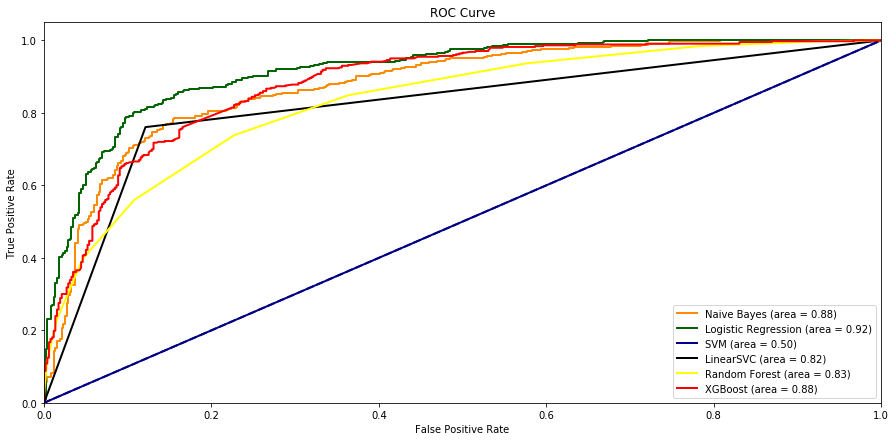

In [17]:
plt.figure(figsize=(15,7))
plt.plot(NB_fpr, NB_tpr, color='darkorange',
        lw=2, label='Naive Bayes (area = %0.2f)' % NB_roc_auc)
plt.plot(LR_fpr, LR_tpr, color='darkgreen',
         lw=2, label='Logistic Regression (area = %0.2f)' % LR_roc_auc)
plt.plot(SVM_fpr, SVM_tpr, color='darkblue',
         lw=2, label='SVM (area = %0.2f)' % SVM_roc_auc)
plt.plot(LSVC_fpr, LSVC_tpr, color='black',
         lw=2, label='LinearSVC (area = %0.2f)' % LSVC_roc_auc)
plt.plot(RF_fpr, RF_tpr, color='yellow',
         lw=2, label='Random Forest (area = %0.2f)' % RF_roc_auc)
plt.plot(XG_fpr, XG_tpr, color='red',
         lw=2, label='XGBoost (area = %0.2f)' % XG_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()